In [2]:
using Serialization
using Plots
include("run_ens_forecast.jl")
using .run_ens_forecast
pyplot()

Plots.PyPlotBackend()

In [3]:
function rel_err(i, name)
   info = deserialize(open(string("out_"*name*"_", i), "r"))
   return (run_ens_forecast.nanmean(info.errs)/run_ens_forecast.nanmean(info.errs_uncorr))
end

rel_err (generic function with 1 method)

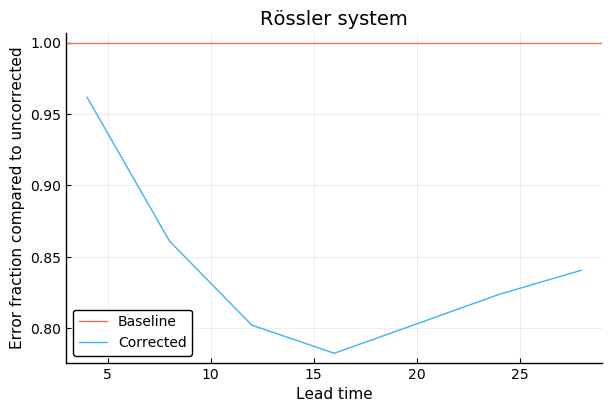

In [18]:
hline([1], label="Baseline", color="#E47650")
plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "rossler"), color="#3DB1FA",
      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Rössler system",
      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.63], label="Estimate from equation")
savefig("rossler_new.pdf")

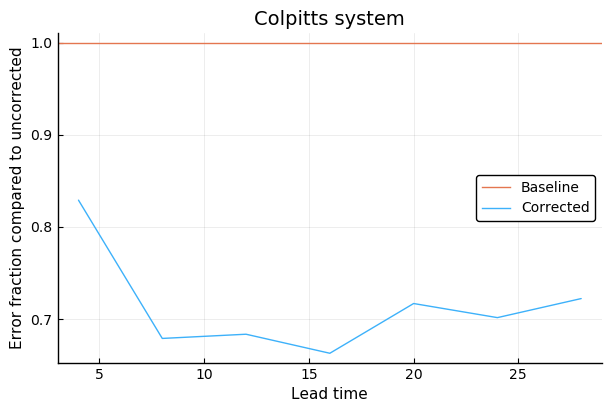

In [16]:
hline([1], label="Baseline", color="#E47650")
plot!((10:10:70)*0.4, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "colpitts"), color="#3DB1FA",
      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Colpitts system",
      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(4 - 1, 70*0.4 + 1)
#hline!([0.64], label="Estimate from equation")
savefig("colpitts_new.pdf")

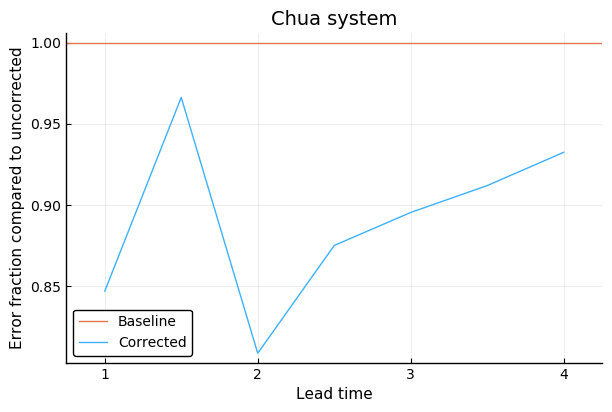

In [13]:
hline([1], label="Baseline", color="#E47650")
plot!((10:5:40)*0.1, rel_err.(["0", "1", "2", "3", "4", "5", "6"], "chua"), color="#3DB1FA",
      xlabel="Lead time", ylabel="Error fraction compared to uncorrected", title="Chua system",
      label="Corrected", xtickfontsize=10, ytickfontsize=10, legendfontsize=10)
xlims!(1 - 1/4, 4 + 1/4)
#hline!([0.86], label="Estimate from equation")
savefig("chua_new.pdf")